In [ ]:
# prompt: Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Data collection and analysis

In [ ]:
#loading the flood dataset to a pandas DataFrame
flood_dataset=pd.read_csv('/content/drive/MyDrive/Flood_Dataset.csv')

In [ ]:
#printing the first 5 rows od the dataset
flood_dataset.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
#printing information of dataset
print(flood_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

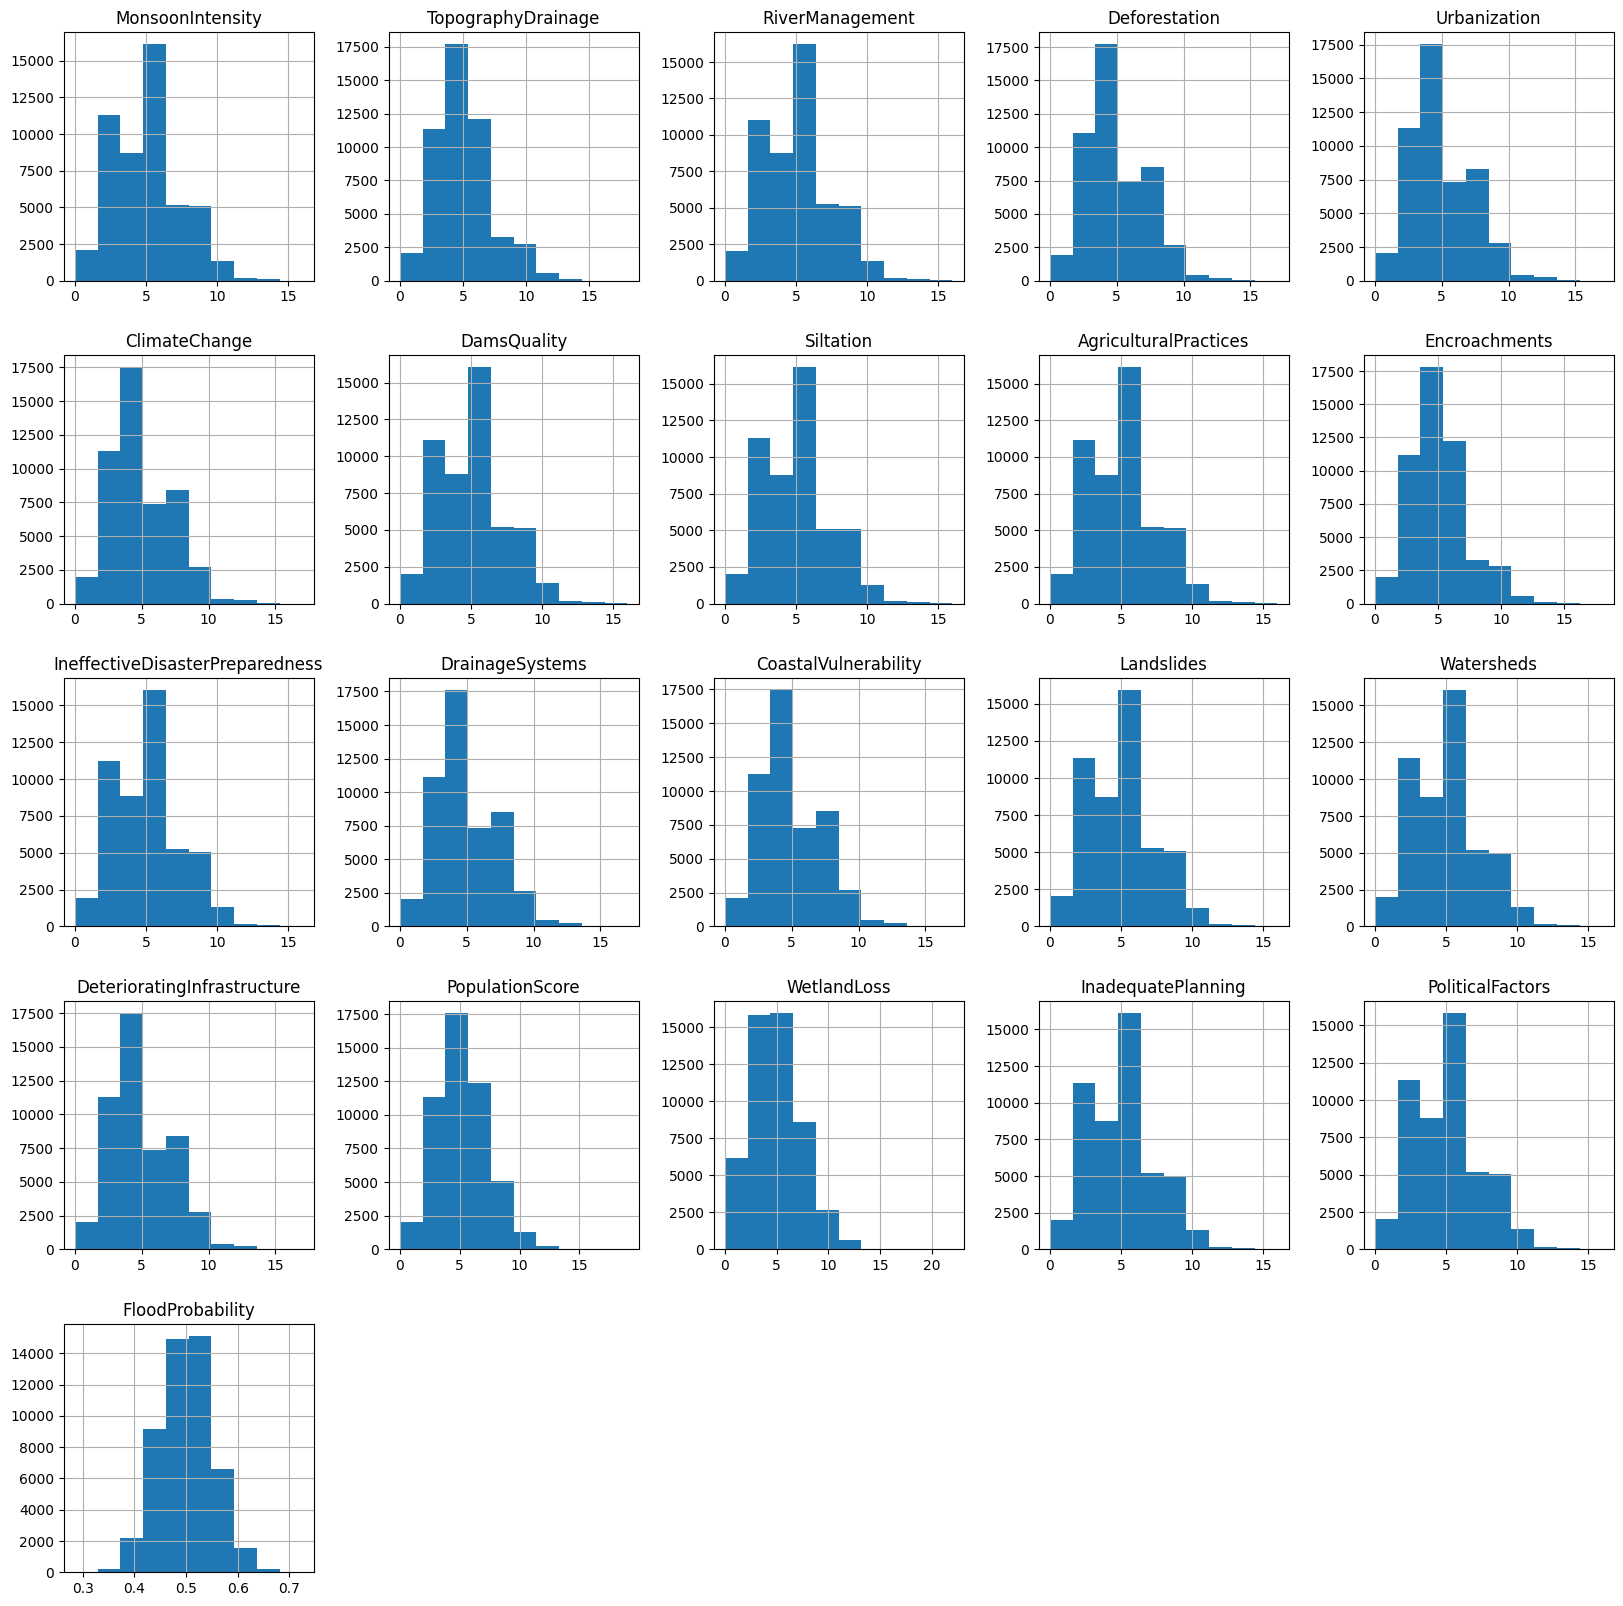

In [ ]:
flood_dataset.hist(figsize = (20,20));

In [ ]:
dataset.hist(figsize = (20,20));

In [ ]:
#number of rows and columns in this dataset
flood_dataset.shape

(50000, 21)

In [ ]:
#getting the statistical measures of the data
flood_dataset.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [ ]:
#checking for missing values
print(flood_dataset.isnull().sum())

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


In [ ]:
flood_dataset['FloodProbability'].value_counts()

,count
FloodProbability,
0.500,2018
0.490,1984
0.495,1975
0.485,1960
0.505,1945
...,...
0.700,1
0.715,1
0.710,1


In [ ]:
flood_dataset.groupby('FloodProbability').mean()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
FloodProbability,,,,,,,,,,,,,,,,,,,,
0.285,3.000000,4.000000,2.000000,1.000000,4.000000,3.000000,2.000000,5.000000,2.000000,3.000000,1.000000,3.000000,4.000000,3.000000,0.000000,9.000000,2.0,0.000000,3.000000,3.000000
0.315,2.000000,6.000000,3.500000,0.500000,4.000000,4.500000,1.000000,3.500000,4.000000,3.000000,3.500000,3.500000,4.500000,2.500000,2.000000,2.000000,3.5,4.000000,3.500000,2.000000
0.320,3.000000,5.333333,4.000000,4.666667,2.333333,3.666667,3.333333,3.333333,3.333333,1.333333,3.666667,3.000000,2.666667,3.333333,3.000000,3.333333,2.0,3.666667,3.666667,1.333333
0.325,4.333333,4.000000,5.000000,1.666667,2.333333,2.000000,2.000000,3.666667,3.333333,2.666667,2.666667,2.333333,3.666667,4.666667,4.000000,4.666667,3.0,1.333333,4.333333,3.333333
0.330,2.666667,4.000000,3.333333,2.000000,3.666667,3.666667,2.000000,3.333333,3.000000,3.000000,4.000000,5.000000,2.666667,3.000000,2.333333,4.666667,3.0,2.333333,3.333333,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.700,5.000000,11.000000,6.000000,7.000000,9.000000,8.000000,4.000000,6.000000,7.000000,5.000000,11.000000,5.000000,5.000000,12.000000,5.000000,8.000000,6.0,5.000000,6.000000,9.000000
0.705,8.000000,5.000000,8.500000,6.500000,10.500000,7.500000,6.000000,5.500000,9.000000,5.000000,8.000000,5.500000,7.500000,7.500000,7.000000,10.500000,3.0,7.000000,6.500000,7.000000
0.710,7.000000,6.000000,7.000000,10.000000,5.000000,11.000000,8.000000,11.000000,3.000000,8.000000,8.000000,7.000000,8.000000,12.000000,2.000000,6.000000,5.0,3.000000,7.000000,8.000000


In [ ]:
#seperating the data and labels
x=flood_dataset.drop(columns='FloodProbability',axis=1)
y=flood_dataset['FloodProbability']

In [ ]:
print(x)

       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                     3                   8                6              6   
1                     8                   4                5              7   
2                     3                  10                4              1   
3                     4                   4                2              7   
4                     3                   7                5              2   
...                 ...                 ...              ...            ...   
49995                 3                   7                4              7   
49996                 3                  10                3              8   
49997                 4                   4                5              7   
49998                 4                   5                4              4   
49999                 4                   5                6              3   

       Urbanization  ClimateChange  DamsQuality  Si

In [ ]:
print(y)

0        0.450
1        0.475
2        0.515
3        0.520
4        0.475
         ...  
49995    0.535
49996    0.510
49997    0.430
49998    0.515
49999    0.580
Name: FloodProbability, Length: 50000, dtype: float64


In [ ]:
#splitting dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [ ]:
print(y_train.dtype)  # Check data type
print(np.unique(y_train))  # Check unique values in target variable


float64
[0.285 0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355 0.36  0.365
 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415 0.42  0.425
 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475 0.48  0.485
 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535 0.54  0.545
 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595 0.6   0.605
 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655 0.66  0.665
 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.715 0.725]


In [ ]:
#converting continuous value into categories(bins)
y_train_binned = pd.cut(y_train, bins=[0, 0.4, 0.6, 1], labels=['Low', 'Medium', 'High'])
y_test_binned = pd.cut(y_test, bins=[0, 0.4, 0.6, 1], labels=['Low', 'Medium', 'High'])
print(y_train_binned)
print(y_test_binned)

5478     Medium
22132    Medium
33533    Medium
42605    Medium
48740    Medium
          ...  
44566    Medium
30280    Medium
6637     Medium
35343    Medium
23720    Medium
Name: FloodProbability, Length: 40000, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
23656    Medium
27442    Medium
40162    Medium
8459     Medium
8051       High
          ...  
44231    Medium
18034    Medium
33856    Medium
15906    Medium
40899    Medium
Name: FloodProbability, Length: 10000, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


#Applying Naive Bayes  algorithm

In [ ]:
#fitting the naive bayes model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train_binned)


GaussianNB()

In [ ]:
#accuracy score
y_pred = nb_model.predict(x_test)
accuracy = accuracy_score(y_test_binned, y_pred)
r2_score = nb_model.score(x_test, y_test_binned)
print("Accuracy:", accuracy)
print("R2 Score:", r2_score)
print(classification_report(y_test_binned, y_pred))
print(confusion_matrix(y_test_binned, y_pred))


Accuracy: 0.9688
R2 Score: 0.9688
              precision    recall  f1-score   support

        High       0.93      0.25      0.40       208
         Low       0.99      0.32      0.49       225
      Medium       0.97      1.00      0.98      9567

    accuracy                           0.97     10000
   macro avg       0.96      0.53      0.62     10000
weighted avg       0.97      0.97      0.96     10000

[[  53    0  155]
 [   0   73  152]
 [   4    1 9562]]


# Applying Linear regression algorithm


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error(RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R² Score: 1.00
Root Mean Squared Error(RMSE): 0.00


#Applying Random forest algorithm

In [ ]:
#appling random forest
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)  # No need to bin y_train in this case
y_pred = regressor.predict(x_test)


# Evaluation of Random forest model

In [ ]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error,  mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Absolute Error: 1.2512768599037828e-16
Mean Squared Error: 2.5880492518280124e-32
Root Mean Squared Error: 1.6087415118122652e-16
R² Score: 1.0


In [ ]:
print(y_pred[:10])  # Print first 10 predictions

[0.4922  0.49255 0.5025  0.50055 0.56295 0.4947  0.47445 0.50055 0.4916
 0.5082 ]


In [ ]:
print(y_test[:10])  # Print first 10 actual values


23656    0.495
27442    0.485
40162    0.505
8459     0.500
8051     0.620
42404    0.485
89       0.450
1461     0.490
13519    0.485
42536    0.505
Name: FloodProbability, dtype: float64


# Visualization of Random forest model

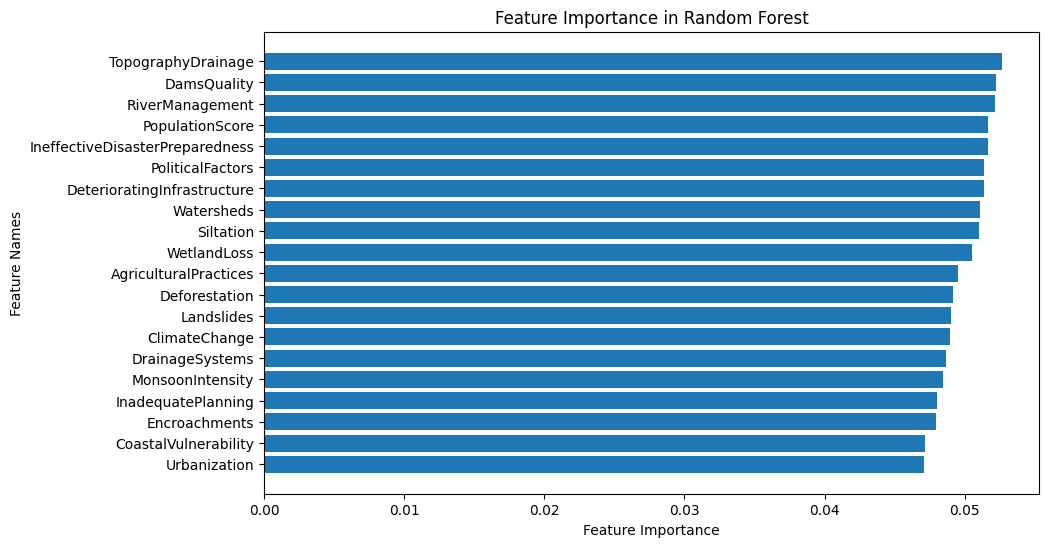

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = regressor.feature_importances_
features = x_train.columns

# Sort feature importance
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Random Forest")
plt.show()


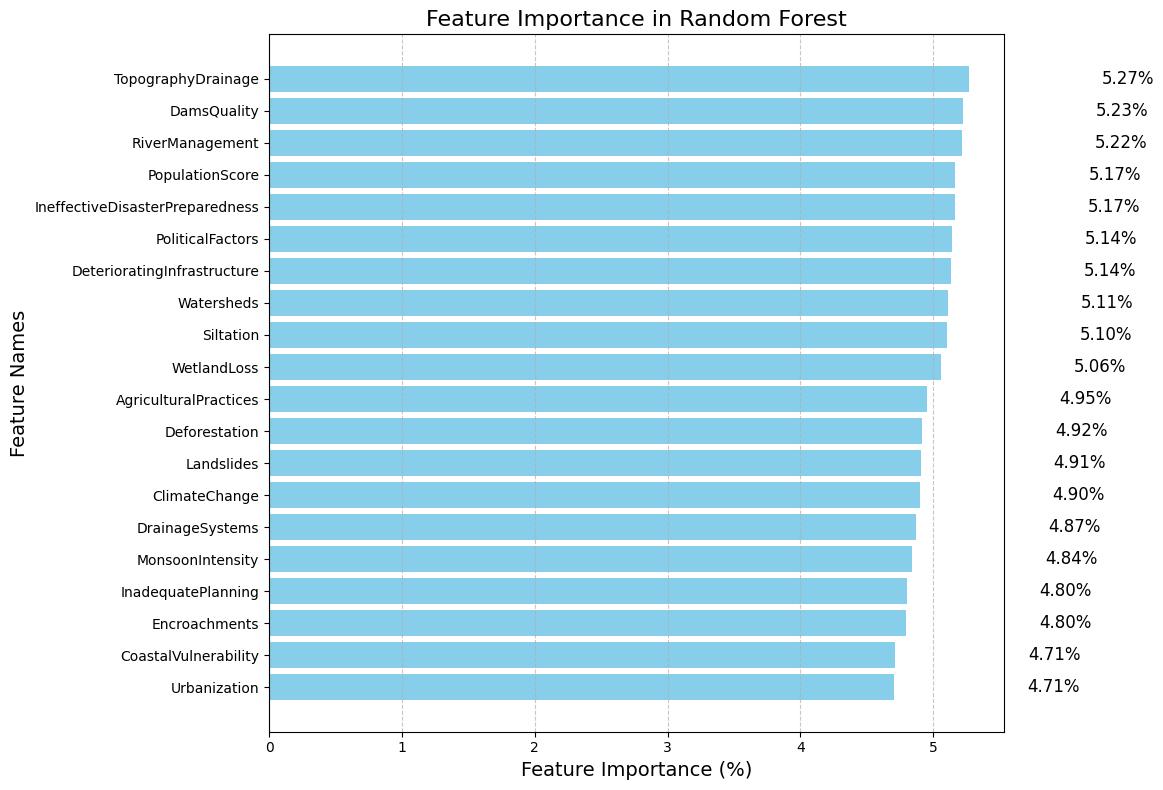

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance values and corresponding features
feature_importance = regressor.feature_importances_
features = x_train.columns

# Sort feature importance
sorted_idx = np.argsort(feature_importance)

# Normalize feature importance to percentages (optional)
importance_percentage = 100 * feature_importance[sorted_idx] / feature_importance.sum()

# Plot
plt.figure(figsize=(12, 8))

# Create a horizontal bar chart
plt.barh(np.array(features)[sorted_idx], importance_percentage, color='skyblue')

# Add grid lines for easier comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels with actual feature importance values
for i, v in enumerate(importance_percentage):
    plt.text(v + 1, i, f'{v:.2f}%', va='center', color='black', fontsize=12)

# Add labels and title
plt.xlabel("Feature Importance (%)", fontsize=14)
plt.ylabel("Feature Names", fontsize=14)
plt.title("Feature Importance in Random Forest", fontsize=16)

# Adjust plot for better spacing
plt.tight_layout()

# Show plot
plt.show()


Evaluation of Random forest model

In [ ]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.020202235000000013


In [ ]:
#Mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0006616642857500003


Feature importance

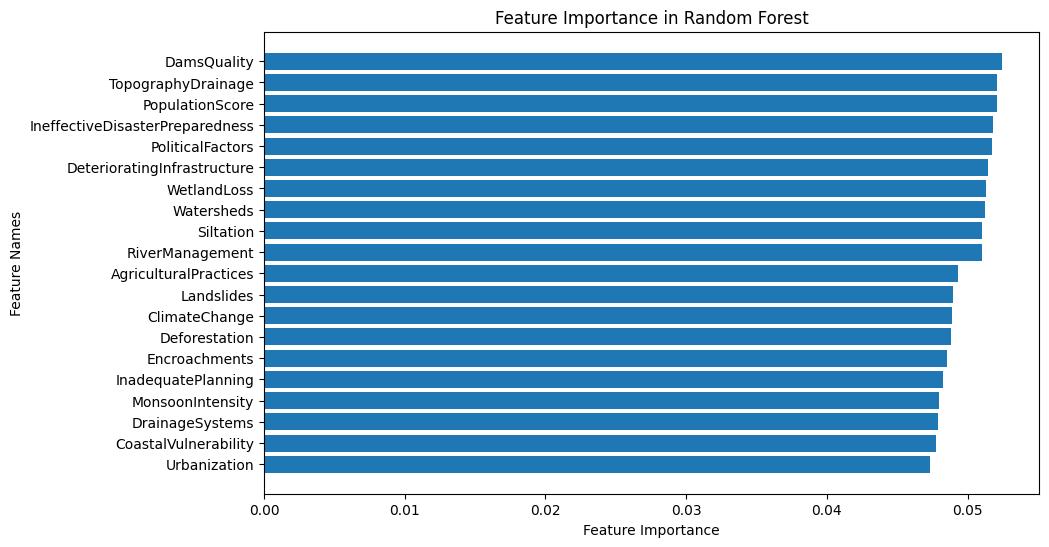

In [ ]:
#checking which features are more important in flood prediction
import matplotlib.pyplot as plt
import numpy as np

feature_importance = regressor.feature_importances_
features = x_train.columns

# Sort feature importance
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Random Forest")
plt.show()


Implementaion of Artificial Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Flood_Dataset.csv')

# Handle missing values (fill with column mean)
df.fillna(df.mean(), inplace=True)

# Check if target is binary or continuous
is_classification = df["FloodProbability"].nunique() == 2  # True if only 0 & 1

# Split features and target variable
X = df.drop(columns=["FloodProbability"])
y = df["FloodProbability"]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the ANN model
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),  # Input layer
    layers.Dense(32, activation="relu"),  # Hidden layer 1
    layers.Dense(16, activation="relu"),  # Hidden layer 2
    layers.Dense(1, activation="sigmoid" if is_classification else "linear")  # Sigmoid for classification, Linear for regression
])

# Compile the model with appropriate loss function
loss_fn = "binary_crossentropy" if is_classification else "mean_squared_error"
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"] if is_classification else ["mae"])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, metric_value = model.evaluate(X_test, y_test)

if is_classification:
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"Test Accuracy: {accuracy:.4f}")
else:
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"Test MAE: {metric_value:.4f}")
    print(f"R² Score: {r2:.4f}")





Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0040 - mae: 0.0276 - val_loss: 5.3329e-06 - val_mae: 0.0013
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.1234e-06 - mae: 0.0014 - val_loss: 1.9522e-06 - val_mae: 0.0011
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.8800e-06 - mae: 8.9487e-04 - val_loss: 1.9785e-06 - val_mae: 0.0013
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.7240e-06 - mae: 9.6130e-04 - val_loss: 7.2423e-06 - val_mae: 0.0026
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.4599e-06 - mae: 0.0011 - val_loss: 1.7524e-06 - val_mae: 0.0013
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3443e-06 - mae: 0.0012 - val_loss: 7.4350e-07 - val_mae: 7.4060e-04
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.4786e-06 - mae: 0.0012 - val_loss: 1.4367e-07 - val_mae: 1.7141e-04
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.2410e-06 - mae: 0.0011 - val_loss: 9.85

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
)

# Function to evaluate classification model
def evaluate_classification_model(model, X_test, y_test):
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

    print("\n🔹 Classification Model Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

    # ROC-AUC (only for binary classification)
    if len(np.unique(y_test)) == 2:
        auc_score = roc_auc_score(y_test, y_pred_prob[:, 1])
        print(f"ROC-AUC Score: {auc_score:.4f}")

# Function to evaluate regression model
def evaluate_regression_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("\n🔹 Regression Model Metrics:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

# Example usage
if __name__ == "__main__":
    # Dummy test data
    X_test = np.random.rand(10, 5)

    # Classification Example (3 Classes)
    y_test_classification = np.random.randint(0, 3, size=(10,))
    model_classification = keras.Sequential([keras.layers.Dense(3, activation="softmax")])
    model_classification.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
    evaluate_classification_model(model_classification, X_test, y_test_classification)

    # Regression Example
    y_test_regression = np.random.rand(10, 1)
    model_regression = keras.Sequential([keras.layers.Dense(1, activation="linear")])
    model_regression.compile(loss="mse", optimizer="adam")
    evaluate_regression_model(model_regression, X_test, y_test_regression)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

🔹 Classification Model Metrics:
Accuracy: 0.4000
Precision: 0.2857
Recall: 0.4000
F1 Score: 0.3333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

🔹 Regression Model Metrics:
Mean Absolute Error (MAE): 0.4908
Mean Squared Error (MSE): 0.3195
Root Mean Squared Error (RMSE): 0.5653
R² Score: -5.6788


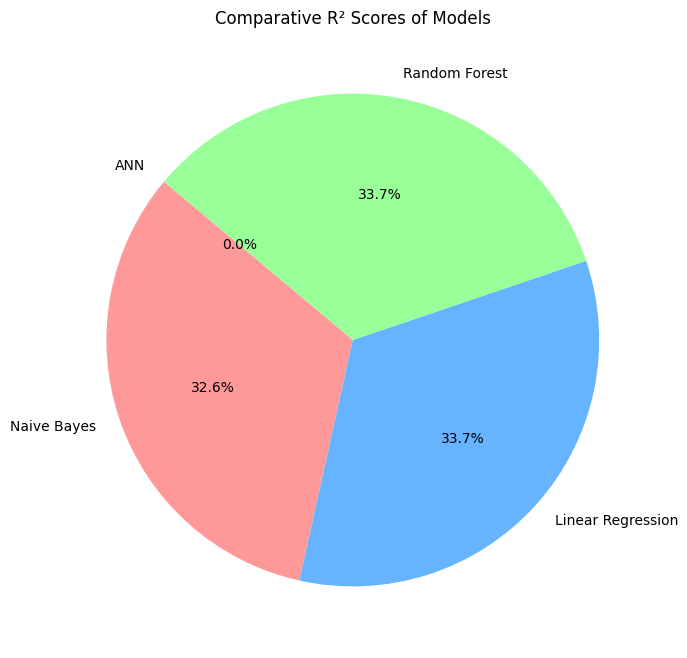

               Model           MAE           MSE          RMSE  R² Score
0        Naive Bayes  0.000000e+00  0.000000e+00  0.000000e+00    0.9688
1  Linear Regression  0.000000e+00  0.000000e+00  0.000000e+00    1.0000
2      Random Forest  1.250000e-16  2.580000e-32  1.600000e-16    1.0000
3                ANN  4.908000e-01  3.195000e-01  5.653000e-01   -5.6788


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# R² Scores from different models
models = ["Naive Bayes", "Linear Regression", "Random Forest", "ANN"]
r2_scores = [0.9688, 1.0, 1.0, -5.6788]  # ANN has a negative R² score

# Fix negative R² scores (convert to zero for pie chart)
r2_scores_fixed = [max(0, score) for score in r2_scores]  # Set negative values to 0

# Pie chart
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(r2_scores_fixed, labels=models, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Comparative R² Scores of Models')
plt.show()

# Table for comparison
metrics = {
    "Model": models,
    "MAE": [0.00, 0.00, 1.25e-16, 0.4908],
    "MSE": [0.00, 0.00, 2.58e-32, 0.3195],
    "RMSE": [0.00, 0.00, 1.60e-16, 0.5653],
    "R² Score": r2_scores
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics)


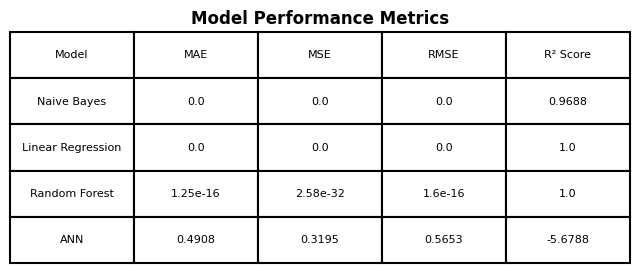

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Model names
models = ["Naive Bayes", "Linear Regression", "Random Forest", "ANN"]

# Model performance metrics
metrics = {
    "Model": models,
    "MAE": [0.00, 0.00, 1.25e-16, 0.4908],
    "MSE": [0.00, 0.00, 2.58e-32, 0.3195],
    "RMSE": [0.00, 0.00, 1.60e-16, 0.5653],
    "R² Score": [0.9688, 1.0, 1.0, -5.6788]  # ANN has a negative R² score
}

# Create DataFrame
df_metrics = pd.DataFrame(metrics)

# Plot table
fig, ax = plt.subplots(figsize=(8, 3))  # Adjust size
ax.axis("tight")
ax.axis("off")

# Create a table with borders
table = ax.table(cellText=df_metrics.values,
                 colLabels=df_metrics.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])  # Fit to figure

# Add borders to the table
for key, cell in table.get_celld().items():
    cell.set_linewidth(1.5)  # Thicker border

# Display the table
plt.title("Model Performance Metrics", fontsize=12, fontweight='bold')
plt.show()
